In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [2]:
#forming a panda dataframe from the metadata file
data=pd.read_csv("UrbanSound8K/metadata/UrbanSound_200.csv")

In [6]:
#head of the dataframe
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [12]:
#count of datapoints in each of the folders
data["fold"].value_counts()

10    50
5     43
1     31
9     27
2     23
7     14
3      8
8      3
6      3
4      1
Name: fold, dtype: int64

In [13]:
from librosa import display
import librosa

In [14]:
#feature set
#This file is of a dog bark
y,sr=librosa.load("UrbanSound8K/audio/fold5/100032-3-0-0.wav")
mfccs = librosa.feature.mfcc(y, sr, n_mfcc=40)

In [15]:
y,sr=librosa.load("UrbanSound8K/1995-1826-0003.wav", sr=None)
print(y.shape)
print(y)
#mfccs = librosa.feature.mfcc(y, sr, n_mfcc=40)

(49440,)
[3.0517578e-05 3.0517578e-05 0.0000000e+00 ... 1.6174316e-03 1.9226074e-03
 2.5634766e-03]


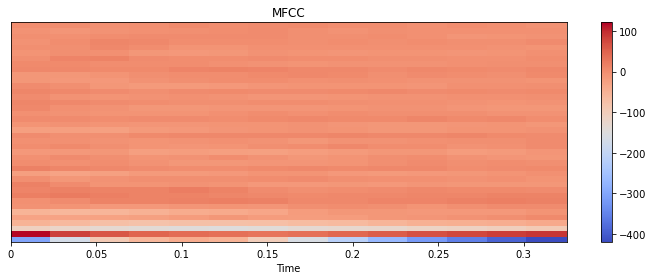

In [16]:
#MFCC of dog bark
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

In [17]:
#preprocessing using only mfcc
x_train=[]
x_test=[]
y_train=[]
y_test=[]
path="UrbanSound8K/audio/fold"
for i in tqdm(range(len(data))):
    fold_no=str(data.iloc[i]["fold"])
    file=data.iloc[i]["slice_file_name"]
    label=data.iloc[i]["classID"]
    filename=path+fold_no+"/"+file
    #print(filename)
    y,sr=librosa.load(filename)
    mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
    #print(mfccs.shape,mfccs.max(),mfccs.min())
    if(fold_no!='10'):
      x_train.append(mfccs)
      y_train.append(label)
    else:
      x_test.append(mfccs)
      y_test.append(label)

100%|██████████| 203/203 [00:24<00:00,  8.16it/s]


In [18]:
len(x_train)+len(x_test)

203

In [19]:
len(data)

203

In [20]:
#converting the lists into numpy arrays
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((153, 40), (50, 40), (153,), (50,))

In [22]:
#saving the data numpy arrays
np.savetxt("train_data.csv", x_train, delimiter=",")
np.savetxt("test_data.csv",x_test,delimiter=",")
np.savetxt("train_labels.csv",y_train,delimiter=",")
np.savetxt("test_labels.csv",y_test,delimiter=",")

In [24]:
x_test[0].shape

(40,)